In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [5]:
x= data.data

In [6]:
y = data.target

In [7]:
from sklearn.neighbors import KNeighborsClassifier 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.35)

In [10]:
model = KNeighborsClassifier()

In [11]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
pre = model.predict(X_test)

In [14]:
df = pd.DataFrame({"Actual":Y_test,"Predicted":pre})

In [16]:
df.head()

,Actual,Predicted
0,5,5
1,3,3
2,4,4
3,5,5
4,5,5


In [17]:
model.score(X_test,Y_test)

0.9825119236883942

In [18]:
from sklearn import model_selection

In [19]:
kfold = model_selection.KFold(n_splits=10,random_state = 7)

In [21]:
res = model_selection.cross_val_score(model,x,y,cv = kfold,scoring ="accuracy")

In [23]:
res.sum()/10

0.9738485412787089

In [24]:
res2 =  model_selection.cross_val_score(model,x,y,cv = kfold,scoring ="neg_log_loss")

In [25]:
res2

array([-0.66831426, -0.02962516, -0.07148313, -0.06420906, -0.43955895,
       -0.03856648, -0.03964212, -0.0349096 , -0.25194677, -0.45336659])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,pre,))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        64
          1       0.96      1.00      0.98        64
          2       0.98      1.00      0.99        50
          3       0.99      0.97      0.98        69
          4       1.00      0.94      0.97        62
          5       0.98      1.00      0.99        62
          6       1.00      1.00      1.00        60
          7       0.94      1.00      0.97        62
          8       0.98      0.97      0.98        64
          9       1.00      0.96      0.98        72

avg / total       0.98      0.98      0.98       629



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,pre))

[[64  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  1 67  0  0  0  0  1  0]
 [ 0  1  0  0 58  0  0  3  0  0]
 [ 0  0  0  0  0 62  0  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 62  0  0]
 [ 0  1  0  1  0  0  0  0 62  0]
 [ 0  1  0  0  0  1  0  1  0 69]]


In [28]:
import seaborn as sns

In [33]:
import matplotlib.pyplot as plt

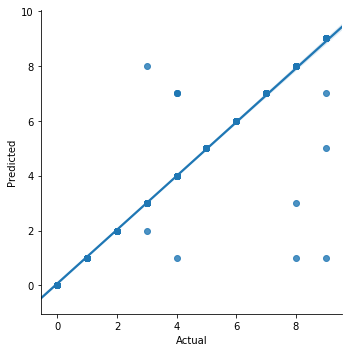

In [34]:
sns.lmplot("Actual",y = "Predicted",data = df)

In [37]:
Y = pd.DataFrame(y)

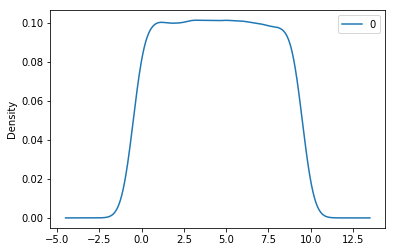

In [42]:
Y.plot(kind = "kde")